In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))

import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

ds = pyxpcm.tutorial.open_dataset('argo').load()
# print(ds)

import numpy as np
# Define a vertical axis to work with
z = np.arange(0.,-1000,-10.)

# Define features to use
features_pcm = {'TEMP': z, 'PSAL': z}

# Instantiate the PCM:
from pyxpcm.models import pcm
m = pcm(K=4, features=features_pcm)

# Fit:
m.fit(ds)

# Predict:
m.predict(ds, inplace=True)
m.predict_proba(ds, inplace=True);

for vname in ['TEMP', 'PSAL']:
    ds = ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True);

pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


(<Figure size 800x640 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f0608d0>,
       dtype=object))

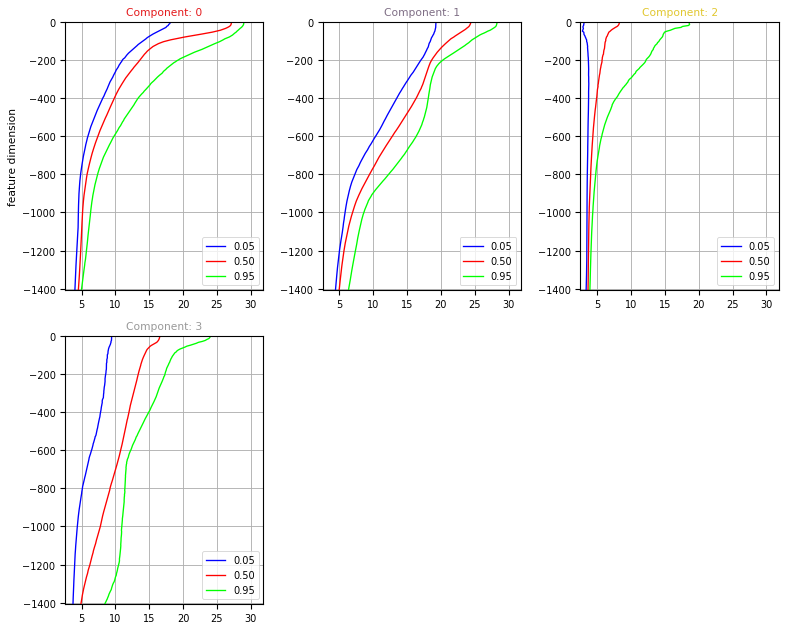

In [10]:
# ds_pcm,_ = ds.pyxpcm.split()
m.plot.quantile(ds_pcm['TEMP_Q'])

In [7]:
# ds = ds.pyxpcm.drop_all()
ds

<xarray.Dataset>
Dimensions:    (DEPTH: 282, N_PROF: 7560)
Coordinates:
  * N_PROF     (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
Data variables:
    LATITUDE   (N_PROF) float32 27.122 27.818 27.452 26.976 ... 4.243 4.15 4.44
    LONGITUDE  (N_PROF) float32 -74.86 -75.6 -74.949 ... -1.263 -0.821 -0.002
    TIME       (N_PROF) datetime64[ns] 2008-06-23T13:07:30 ... 2013-03-09T14:52:58.124999936
    DBINDEX    (N_PROF) float64 1.484e+04 1.622e+04 ... 8.557e+03 1.063e+04
    TEMP       (N_PROF, DEPTH) float32 27.422163 27.422163 ... 4.391791
    PSAL       (N_PROF, DEPTH) float32 36.35267 36.35267 ... 34.909523 34.910286
    SIG0       (N_PROF, DEPTH) float32 23.601229 23.601229 ... 27.685583
    BRV2       (N_PROF, DEPTH) float32 0.00029447526 ... 4.500769e-06
Attributes:
    Sample test prepared by:  G. Maze
    Institution:              Ifremer/LOPS
    Data source DOI:          10.17882

In [20]:
[k for k in ds.dims if k not in ds.pyxpcm._dims]

['pcm_class', 'quantile']

In [5]:
# list(ds.dims.keys())
# ds = ds.drop_dims([k for k in ds.dims if k not in ds.pyxpcm._dims])
# ds = ds.drop([
#             k for k, v in ds.variables.items()
#             if v.attrs.get("_pyXpcm_cleanable")
#         ])

# ds = ds.drop([
#             k for k, v in ds.drop_dims([k for k in ds.dims if k not in ds.pyxpcm._dims]).variables.items()
#             if v.attrs.get("_pyXpcm_cleanable")
#         ])
[k for k, v in ds.drop_dims([k for k in ds.dims if k not in ds.pyxpcm._dims]).variables.items()]

# [k for k in ds.pyxpcm._dims]
# [k for k in ds.dims if k not in ds.pyxpcm._dims]
# ds

['pcm_class',
 'N_PROF',
 'DEPTH',
 'LATITUDE',
 'LONGITUDE',
 'TIME',
 'DBINDEX',
 'TEMP',
 'PSAL',
 'SIG0',
 'BRV2',
 'quantile']

In [16]:
ds = ds.drop_dims('quantile')
ds
# [k for k, v in ds.variables.items() if v.attrs.get("_pyXpcm_cleanable")]

<xarray.Dataset>
Dimensions:    (DEPTH: 282, N_PROF: 7560, pcm_class: 4)
Coordinates:
  * pcm_class  (pcm_class) int64 0 1 2 3
  * N_PROF     (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
Data variables:
    LATITUDE   (N_PROF) float32 27.122 27.818 27.452 26.976 ... 4.243 4.15 4.44
    LONGITUDE  (N_PROF) float32 -74.86 -75.6 -74.949 ... -1.263 -0.821 -0.002
    TIME       (N_PROF) datetime64[ns] 2008-06-23T13:07:30 ... 2013-03-09T14:52:58.124999936
    DBINDEX    (N_PROF) float64 1.484e+04 1.622e+04 ... 8.557e+03 1.063e+04
    TEMP       (N_PROF, DEPTH) float32 27.422163 27.422163 ... 4.391791
    PSAL       (N_PROF, DEPTH) float32 36.35267 36.35267 ... 34.909523 34.910286
    SIG0       (N_PROF, DEPTH) float32 23.601229 23.601229 ... 27.685583
    BRV2       (N_PROF, DEPTH) float32 0.00029447526 ... 4.500769e-06
Attributes:
    Sample test prepared by:  G. Maze
    Institution:          

In [22]:
ds.drop_dims?

Signature: ds.drop_dims(drop_dims)
Docstring:
Drop dimensions and associated variables from this dataset.

Parameters
----------
drop_dims : str or list
    Dimension or dimensions to drop.

Returns
-------
obj : Dataset
    The dataset without the given dimensions (or any variables
    containing those dimensions)
File:      ~/anaconda/envs/obidam36/lib/python3.6/site-packages/xarray/core/dataset.py
Type:      method


In [13]:
def add_doc(value):
    def _doc(func):
        func.__doc__ = value
        return func
    return _doc

def to_netcdf(file):
    """Save object to netcdf file"""
    return file

class pcm():
#     def __init__(self):
#         self.to_netcdf.__func__.__doc__ = to_netcdf.__doc__
    
    @add_doc(to_netcdf.__doc__)
    def to_netcdf(self, file):
        """I want to inherit a docstring"""
        return to_netcdf(file)
    
m = pcm()
m.to_netcdf('toto.nc')
m.to_netcdf?

Signature: m.to_netcdf(file)
Docstring: Save object to netcdf file
File:      ~/git/github/gmaze/pyxpcm/docs/offline/<ipython-input-13-e21b704e7114>
Type:      method


In [14]:
def add_doc(value):
    def _doc(func):
        func.__doc__ = func.__doc__ + "\n" + value
        return func
    return _doc

def quantile(m, data):
    """Real Plot quantile docstring
    
        Parameters
        ----------
        :class:`pyxpcm.pcm` instance
        
        :class:`xarray.DataArray` instance
        
    """
    return data

class _PlotFunctions():
    def __init__(self, m):
        self.pcm = m
    
    @add_doc(quantile.__doc__)
    def quantile(self, data):
        """_PlotFunctions/quantile docstring
        
            Parameters
            ----------
            :class:`xarray.DataArray` instance
        """
        return quantile(self.pcm, data)

class pcm():
    def __init__(self):
        self.ok = 0
    
    @property
    def plot(self):
        return _PlotFunctions(self)
    
# p = _PlotFunctions()
# p.quantile?

m = pcm()
m.plot.quantile?

Signature: m.plot.quantile(data)
Docstring:
_PlotFunctions/quantile docstring
        
            Parameters
            ----------
            :class:`xarray.DataArray` instance
        
Real Plot quantile docstring
    
        Parameters
        ----------
        :class:`pyxpcm.pcm` instance
        
        :class:`xarray.DataArray` instance
        
    
File:      ~/git/github/gmaze/pyxpcm/docs/offline/<ipython-input-14-1d9685108fee>
Type:      method


In [25]:
import xarray as xr

# Decorators
def pcm_method(func):
    pcm_docstring = getattr(pcm, func.__name__).__doc__
    # Replace dataset by pcm in parameters:
#     accessor_docstring = pcm_docstring.replace("dataset","pcm")
    accessor_docstring = pcm_docstring.replace("ds: :class:`xarray.Dataset`","pcm: :class:`pyxpcm.models.pcm`")
    func.__doc__ = accessor_docstring
    return func

def docstring(value):
    def _doc(func):
        # Remove pcm from the list of parameters:
        newdoc = list()
        [newdoc.append(line) for line in func.__doc__.split("\n") if ':class:`pyxpcm.models.pcm`' not in line]
        newdoc = "\n".join(newdoc)        
        func.__doc__ = newdoc
        return func
    return _doc

def fit(m, ds,  *w, **kw):
    """Main function docstring
    
        Parameters
        ----------
        pcm: :class:`pyxpcm.models.pcm`
        ds: :class:`xarray.Dataset`
    """
    return True

class pcm():
    
    @docstring(fit.__doc__)
    def fit(self, ds, *w, **kw):
        """pcm function
    
            Parameters
            ----------
            ds: :class:`xarray.Dataset`
        """
        return fit(self, ds, *w, **kw)


    
@xr.register_dataset_accessor('pyxpcm')
class pyXpcmDataSetAccessor:
    def __init__(self, obj):
        self.obj = obj
    
    @pcm_method
    def fit(self, m):
        """xarray accessor function
    
            Parameters
            ----------
            pcm: :class:`pyxpcm.models.pcm`
        """
        return m.fit(self.obj, *w, **kw)
        
# m.fit(ds, *w, **kw)
# ds.pyxpcm.fit(m, *w, **kw)

my_pcm = pcm()
my_pcm.fit?

/Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/ipykernel_launcher.py:46: AccessorRegistrationWarning: registration of accessor <class '__main__.pyXpcmDataSetAccessor'> under name 'pyxpcm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.


Signature: my_pcm.fit(ds, *w, **kw)
Docstring:
pcm function

Parameters
----------
ds: :class:`xarray.Dataset`
File:      ~/git/github/gmaze/pyxpcm/docs/offline/<ipython-input-25-5993cf435505>
Type:      method


In [24]:
da = xr.DataArray(12,name='toto').to_dataset()
da.pyxpcm.fit?

Signature: da.pyxpcm.fit(m)
Docstring:
pcm function

Parameters
----------
pcm: :class:`pyxpcm.models.pcm`
File:      ~/git/github/gmaze/pyxpcm/docs/offline/<ipython-input-23-0730034dfeb3>
Type:      method


In [8]:
import xarray as xr

# Decorators
def pcm_method(func):
    pcm_docstring = getattr(pcm, func.__name__).__doc__
    # Replace dataset by pcm in parameters:
#     accessor_docstring = pcm_docstring.replace("dataset","pcm")
    accessor_docstring = pcm_docstring.replace("ds: :class:`xarray.Dataset`","pcm: :class:`pyxpcm.models.pcm`")
    func.__doc__ = accessor_docstring
    return func

def docstring(value):
    def _doc(func):
        # Remove pcm from the list of parameters:
        newdoc = list()
        [newdoc.append(line) for line in func.__doc__.split("\n") if ':class:`pyxpcm.models.pcm`' not in line]
        newdoc = "\n".join(newdoc)        
        func.__doc__ = newdoc
        return func
    return _doc

def _pcmplot(func):
    commondoc = """
        x: float
        y: int
        
        Ouput
        -----
        ds: :class:`xarray.Dataset`
    """
    func.__doc__ = commondoc

@_pcmplot
def fit(m, ds,  *w, **kw):
    return True

class pcm():
    
    @docstring(fit.__doc__)
    def fit(self, ds, *w, **kw):
        """PCM fit method
        
            Parameters
            ----------
            ds: :class:`xarray.Dataset`
        """
        return fit(self, ds, *w, **kw)


    
@xr.register_dataset_accessor('pyxpcm')
class pyXpcmDataSetAccessor:
    def __init__(self, obj):
        self.obj = obj
    
    @pcm_method
    def fit(self, m):
        """xarray accessor function
    
            Parameters
            ----------
            pcm: :class:`pyxpcm.models.pcm`
        """
        return m.fit(self.obj, *w, **kw)
        
# m.fit(ds, *w, **kw)
# ds.pyxpcm.fit(m, *w, **kw)

my_pcm = pcm()
my_pcm.fit?

Main function docstring
    
        Parameters
        ----------
        pcm
        dataset
    


In [27]:
import sys, os
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))
import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


/Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/xarray.py:36: AccessorRegistrationWarning: registration of accessor <class 'pyxpcm.xarray.pyXpcmDataSetAccessor'> under name 'pyxpcm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor('pyxpcm')


In [28]:
ncfile = 'https://www.seanoe.org/data/00360/47106/data/47067.nc'
m = pyxpcm.load_netcdf(ncfile)

OSError: [Errno -90] NetCDF: file not found: b'https://www.seanoe.org/data/00360/47106/data/47067.nc'

In [ ]:
# pyxpcm.catalog




In [29]:
2038/5

407.6

In [30]:
3545/8

443.125

In [31]:
ds = xr.open_dataset('/Users/gmaze/git/github/obidam/pyxpcm-data/isas15series_sample_test.nc')
ds

<xarray.Dataset>
Dimensions:      (depth: 152, latitude: 53, longitude: 61, time: 12)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-15 2005-02-15 ... 2005-12-15
  * latitude     (latitude) float32 30.023445 30.455408 ... 49.41288 49.737103
  * longitude    (longitude) float32 -70.0 -69.5 -69.0 ... -41.0 -40.5 -40.0
  * depth        (depth) float32 1.0 3.0 5.0 10.0 ... 1960.0 1980.0 2000.0
Data variables:
    PSAL         (time, depth, latitude, longitude) float32 ...
    PSAL_ERR     (time, depth, latitude, longitude) float32 ...
    PSAL_PCTVAR  (time, depth, latitude, longitude) float32 ...
    TEMP         (time, depth, latitude, longitude) float32 ...
    TEMP_ERR     (time, depth, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20171122T133700L : Creation
    institution:            LOPS-SNO-Argo
    

In [33]:
ds = ds.isel(time=[0,1,2,3,4,5])
ds

<xarray.Dataset>
Dimensions:      (depth: 152, latitude: 53, longitude: 61, time: 6)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-15 2005-02-15 ... 2005-06-15
  * latitude     (latitude) float32 30.023445 30.455408 ... 49.41288 49.737103
  * longitude    (longitude) float32 -70.0 -69.5 -69.0 ... -41.0 -40.5 -40.0
  * depth        (depth) float32 1.0 3.0 5.0 10.0 ... 1960.0 1980.0 2000.0
Data variables:
    PSAL         (time, depth, latitude, longitude) float32 ...
    PSAL_ERR     (time, depth, latitude, longitude) float32 ...
    PSAL_PCTVAR  (time, depth, latitude, longitude) float32 ...
    TEMP         (time, depth, latitude, longitude) float32 ...
    TEMP_ERR     (time, depth, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20171122T133700L : Creation
    institution:            LOPS-SNO-Argo
    p

In [34]:
ds.to_netcdf('/Users/gmaze/git/github/obidam/pyxpcm-data/isas15series_sample_test_smaller.nc')